In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データセットを読み込むモジュール
from sklearn.datasets import load_iris

# 標準化（分散正規化）を行うモジュール
from sklearn.preprocessing import StandardScaler

# 訓練データとテストデータを分割するモジュール
from sklearn.model_selection import train_test_split

# 決定木を実行するモジュール
from sklearn.tree import DecisionTreeClassifier

# 決定木をプロットするモジュール
from sklearn.tree import plot_tree

In [2]:
# irisデータセットの読み込み
iris = load_iris()

# 目的変数と説明変数（特徴量）に分ける
X, y = iris.data[:, [0, 2]], iris.target

# 標準化（分散正規化）
std = StandardScaler()
X = std.fit_transform(X)

# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

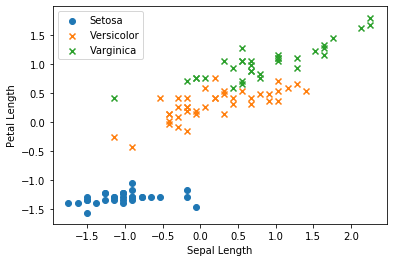

In [3]:
# 描画オブジェクトとサブプロットの作成
fig, ax = plt.subplots()

# Setosa のプロット
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
           marker = 'o', label = 'Setosa')

# Versicolor のプロット
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
           marker = 'x', label = 'Versicolor')

# Varginica のプロット
ax.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1],
           marker = 'x', label = 'Varginica')

# 軸ラベルの設定
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')

# 凡例の設定 
ax.legend(loc = 'best')

plt.show()


In [4]:
# インスタンスを作成
tree = DecisionTreeClassifier(max_depth = 3)

# 訓練データからモデルを作成
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

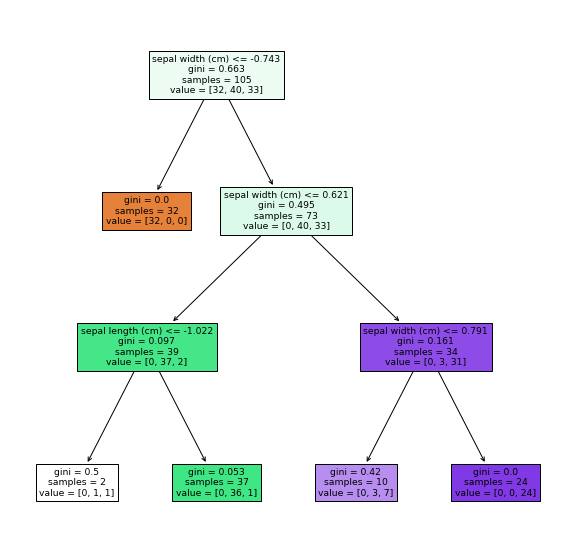

In [5]:
# プロットの大きさを設定
fig, ax = plt.subplots(figsize=(10, 10))

# plot_tree メソッドを使用する（引数：決定木のインスタンス、特徴量リスト）
plot_tree(tree, feature_names=iris.feature_names, filled=True)

plt.show()

In [6]:
# 分類結果を予測する
y_pred = tree.predict(X_test)

# 予測値と正解値を出力
print(y_pred)
print(y_test)

[2 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2]


In [7]:
# 正解率を出力
print(tree.score(X_test, y_test))

0.9555555555555556


参考文献：決定木のプロット：https://qiita.com/y-vectorfield/items/4315338d11d4ba8efb0d